In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bankdata.csv')

# Basic Overview 

In [3]:
df.describe()

,amount,balance
count,509.000000,509.000000
mean,8736.453006,115873.671493
std,27181.105774,136850.421744
min,1.000000,0.130000
25%,400.000000,35345.130000
50%,1120.000000,56645.670000
75%,7000.000000,121341.470000
max,360000.000000,473292.870000


In [4]:
df.columns

Index(['date', 'DrCr', 'amount', 'balance', 'mode', 'name'], dtype='object')

In [5]:
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)
    else: numerical_columns.append(i) 

In [6]:
categorical_columns

['date', 'DrCr', 'mode', 'name']

# Univariate Analysis

##### 1. Categoriacal

In [7]:
df[categorical_columns].head(2)

,date,DrCr,mode,name
0,01-01-2022,Db,ATM,NaN
1,01-01-2022,Db,ATM,NaN


Number of days inactive (days transaction does not happens)

In [8]:
646 - len(df['date'].value_counts()) #total days of 2022 & 2023 - number of unique dates

333

Dates on which maximum transactions happened

In [9]:
df['date'].value_counts()[df['date'].value_counts().max() == df['date'].value_counts()]

21-02-2022    5
10-01-2022    5
12-01-2022    5
17-01-2023    5
31-01-2023    5
25-09-2023    5
Name: date, dtype: int64

3. Adding Day, Month and Year

In [10]:
df2 = df.copy()

In [11]:
day = []
month = []
year = []
for i in range(df2['date'].size):
    s = df2['date'].values[i].split('-')
    day.append(s[0])
    month.append(s[1])
    year.append(s[2])

In [12]:
df['Day'] = day
df['Month'] = month
df['Year'] = year

In [13]:
df.sample(4)

,date,DrCr,amount,balance,mode,name,Day,Month,Year
1,01-01-2022,Db,10000.0,463292.87,ATM,NaN,01,01,2022
449,18-08-2023,Cr,12500.0,38164.42,UPI,NAFEESAB,18,08,2023
306,16-02-2023,Cr,5000.0,35744.13,ATM,NaN,16,02,2023
218,15-11-2022,Db,6099.0,18482.75,UPI,NANDISHM,15,11,2022


4. In Which year more transaction are present?

In [14]:
df['Year'].value_counts()

2022    260
2023    249
Name: Year, dtype: int64

Now take 2nd Category i.e., DrCr

1. Percent of debit and credit

In [15]:
df['DrCr'].value_counts()/df['DrCr'].value_counts().sum() * 100

Db    73.280943
Cr    26.719057
Name: DrCr, dtype: float64

2. Plot Graph of above observings

<Axes: ylabel='DrCr'>

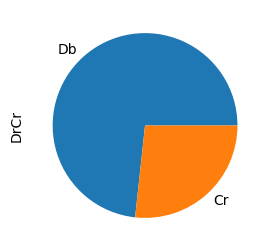

In [16]:
df['DrCr'].value_counts().plot(kind='pie',figsize=(3,3))

**Conclusion:** Out of 4 trnasactions 1 may be credit remaining 3(debits)

Now 3rd Category i.e., Mode

1. How Many ATM transactions are present?

In [17]:
(df['mode']=='ATM').sum()

49

2. Percentages of UPI transactions?
   **a.** Overall and
   **b.** UPI vs ATM 

In [18]:
df['mode'].value_counts()['UPI']/df['mode'].value_counts().sum() * 100

72.69155206286837

In [19]:
df['mode'].value_counts()['UPI'] / (df['mode'].value_counts()['UPI'] + df['mode'].value_counts()['ATM']) * 100

88.3054892601432

Now 4th Category i.e., Name

1. Name most frequent person ?

In [20]:
df['name'].value_counts().index[0]

'ABUTALAH'

2. plot graph of top 5 names.

<Axes: >

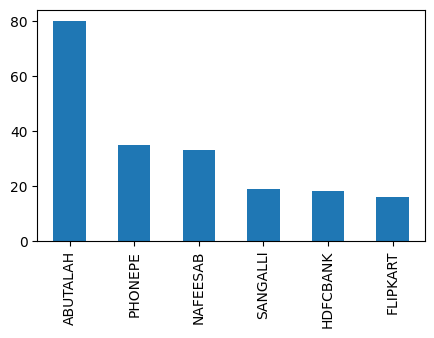

In [21]:
df['name'].value_counts()[:6].plot(kind='bar', figsize=(5,3))

#### Numerical colums

Analysis corresponding to Column-amount

1. Plot a line chart to get overview across time.

<Axes: >

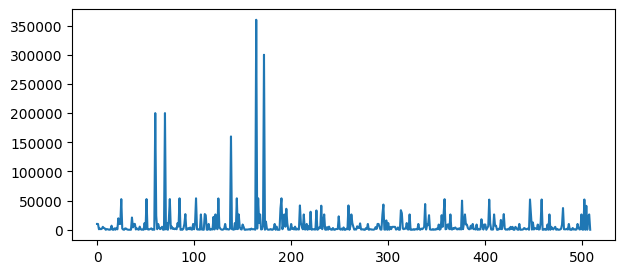

In [22]:
df['amount'].plot(figsize=(7,3))

2. Plot a histogram on it

<Axes: ylabel='Frequency'>

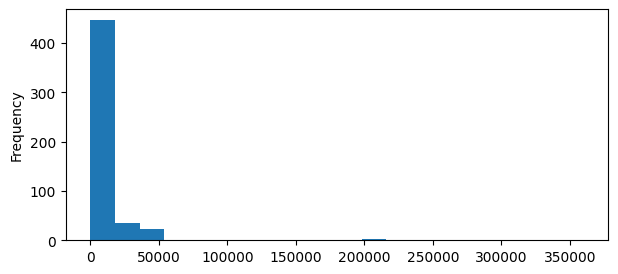

In [23]:
df['amount'].plot(kind='hist', figsize=(7,3), bins=20)

As we can see from line chart and histogram the outliers are present

There may be 5 outliers in data 

3. Remove extreme ouliers from copy df2 and check distribution

<Axes: >

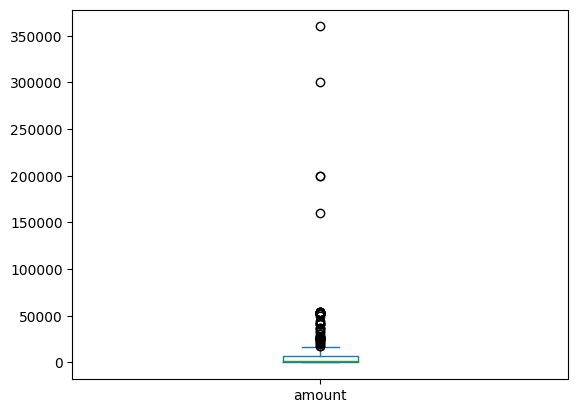

In [24]:
df['amount'].plot(kind='box')

There seem 4 extreme outliers greater than 100000

In [25]:
(df2['amount']<=100000).sum()

504

And there! are 5 may be overlaping points on box plot 

<Axes: ylabel='Frequency'>

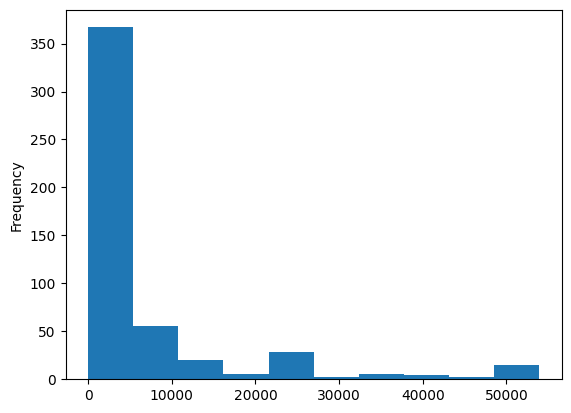

In [26]:
df2['amount'][df2['amount']<=100000].plot(kind='hist')

4. Remove 7 from above distribution percentile data and plot.

In [27]:
df3 = df2['amount'][df2['amount']<=100000].copy()

<Axes: ylabel='Frequency'>

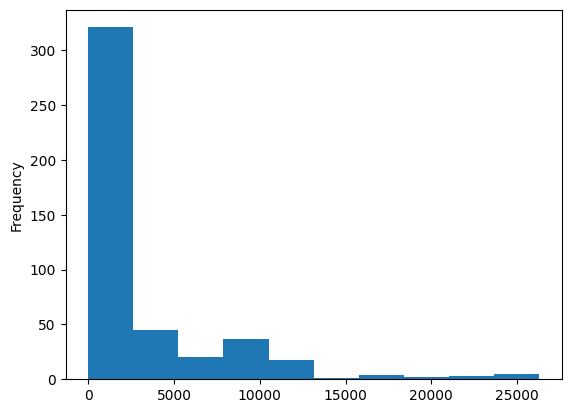

In [28]:
df3[df3<df3.quantile(0.93)].plot(kind='hist')

**Conclusion:** Its following Pareto distribution

Let's find what percent of data lies below 2500

In [29]:
df3[df3<df3.quantile(0.93)][df3[df3<df3.quantile(0.93)]<2500].size

319

In [30]:
df3[df3<df3.quantile(0.93)].size

456

In [31]:
round(319/456 * 100)

70

Its foloowing 70-30 rule

# Bivariate Analysis

In [32]:
categorical_columns

['date', 'DrCr', 'mode', 'name']

1. Date vs DrCr category

a. Show Contingency Table 

In [33]:
pd.crosstab(df['Year'],df['DrCr'])

DrCr,Cr,Db
Year,,
2022,74,186
2023,62,187


#### Balance the a/c for year 2023

In [108]:
a2023 = df.groupby('Year').get_group('2023')

In [110]:
a2023[a2023['DrCr']=='Cr']['amount'].sum()

770824.41

In [111]:
a2023[a2023['DrCr']=='Db']['amount'].sum()

780848.98

In [124]:
df.iloc[259]['balance'] # there are 260 transactions in year 2022

104980.04

In [125]:
df.iloc[508]['balance'] # balance at last day of 2023 from data available

94955.47

#### Balancing a/c for the year 2023
###### Opening Balance = 104980.04
###### Amount Credited in Year 2023 = 770824.41
###### Amount Debited in Year 2023 = 780848.98
###### Closing Balance = 94955.47


b. How many days of year 2023 are without a Debit type of transaction

In [34]:
pd.crosstab(df['date'],df['DrCr']) # - pd.crosstab(df['Year'],df['DrCr'])['Db']['2023']

DrCr,Cr,Db
date,,
01-01-2022,0,2
01-01-2023,1,1
01-02-2022,1,0
01-02-2023,1,0
01-03-2022,1,2
...,...,...
31-01-2023,2,3
31-03-2022,0,1
31-07-2023,0,1


In [35]:
ac = 646-365 # number of days from 1/jan/2023 to 7/oct/2023

In [36]:
df2 = df.set_index('date').copy()

In [37]:
year_2023 = df2[df2['Year']=='2023'].index

In [38]:
(pd.crosstab(df['date'],df['DrCr']).loc[year_2023]['Db'] == 0).sum()

34

Therefore, 34 days there are no bebit transactions in year 2023

In [39]:
(pd.crosstab(df['date'],df['DrCr']).loc[year_2023]['Db']<6).sum()

249

There are 249 Transactioon in year 2023

In [40]:
ac - 249

32

There are no debit type of transaction on 32 day

c. How many days of year 2022 have debit or credit transaction

By the fact that, in dataset each mentioned day is either a debit or credit type of transaction 
can just subtract them from total days

In [41]:
len(set(df2.index)) # df2.index <-- there are repeated values hence typecast into a set

313

In [42]:
313 - len(set(year_2023)) #transactions days in year 2022

168

d. Day or Days on which maximum number of credit happened?

In [43]:
dates = pd.crosstab(df['date'],df['DrCr'])['Cr'][pd.crosstab(df['date'],df['DrCr'])['Cr'] == pd.crosstab(df['date'],df['DrCr'])['Cr'].max()].index

In [44]:
list(dates)

['06-10-2023', '10-07-2023', '11-05-2022', '14-12-2022']

2. Date vs Mode

a. Form a contengency table between them

In [45]:
pd.crosstab(df['Year'],df['mode'])

mode,ATM,CHEQUE,DEBIT CARD ANNUAL,ECS,FUNDS TRANSFER DEBIT,IMPS,NEFT,OTHER,SBINT,SMS CHARGES,STOCK CHRG,UNKNOWN,UPI
Year,,,,,,,,,,,,,
2022,18,4,1,12,1,3,24,0,4,4,2,0,187
2023,31,1,1,10,1,1,13,1,3,3,0,1,183


**Conclusion:** There Seems positive correlation between them

b. Plot Scatter plot of above data

In [46]:
x = pd.crosstab(df['Year'],df['mode']).iloc[0]

In [47]:
y = pd.crosstab(df['Year'],df['mode']).iloc[1]

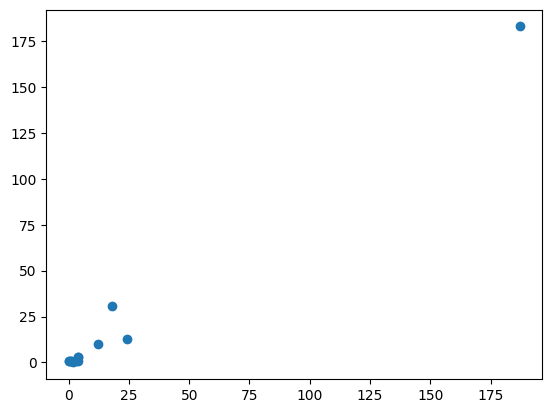

In [48]:
plt.scatter(x, y)
plt.show()

In [49]:
import scipy.stats as st

In [50]:
st.pearsonr(x,y)[0]

0.9948227074726175

3. Date vs Name

a. The person who's trnsaction are more in 2023

In [51]:
c = df.groupby('Year').get_group('2023')['name'].value_counts()

In [52]:
c[c == c.max()]

ABUTALAH    35
Name: name, dtype: int64

b. 3rd most person in year 2022

In [53]:
c = df.groupby('Year').get_group('2022')['name'].value_counts()

In [54]:
c.index[2]

'NAFEESAB'

4. DrCr vs Mode

a. Contengency table 

In [55]:
x = df['DrCr']
y = df['mode']
pd.crosstab(x,y)

mode,ATM,CHEQUE,DEBIT CARD ANNUAL,ECS,FUNDS TRANSFER DEBIT,IMPS,NEFT,OTHER,SBINT,SMS CHARGES,STOCK CHRG,UNKNOWN,UPI
DrCr,,,,,,,,,,,,,
Cr,2,1,0,21,2,4,37,0,7,0,0,0,62
Db,47,4,2,1,0,0,0,1,0,7,2,1,308


b. Which mode of transaction has more Credit

In [56]:
mode_tr = pd.crosstab(df['DrCr'], df['mode']).loc['Cr']

In [57]:
mode_tr[mode_tr==mode_tr.max()]

mode
UPI    62
Name: Cr, dtype: int64

**OR**

In [58]:
df.groupby('DrCr').get_group('Cr')['mode'].value_counts().index[0]

'UPI'

5. DrCr Vs name

a. Who is 4th most person to do Credit type of transaction

In [59]:
df.groupby('DrCr').get_group('Cr')['name'].value_counts().index[3]

'DADAKHALA'

b. name of all person who are in debit type only

In [60]:
set(df.groupby('DrCr').get_group('Cr')['name'].values) 
#name of all person who have done Cr type of transaction

{'1MGHEALT',
 'ABUTALAH',
 'ASGARALI',
 'BHIMANAGO',
 'BUDESAHEB',
 'DADAKHALA',
 'HANAMANTH',
 'ISUFSABA',
 'KOTINATOT',
 'MAHAMMADG',
 'MALATESH',
 'MANIYARA',
 'MEHTAMOH',
 'MOHAMMED',
 'MOHAMMEDI',
 'NAFEESAB',
 'PHONEPE',
 'RAHILMAN',
 'SANTOSHI',
 'SHIVANAND',
 nan}

In [61]:
len(set(df.groupby('DrCr').get_group('Cr')['name'].values))

21

In [62]:
df['name'].value_counts().size # Number of persons who have done transactions

75

But Who are they?

In [63]:
(set(df['name'].value_counts().index) - set(df.groupby('DrCr').get_group('Cr')['name'].values))

{'ABDULHAME',
 'ABUTALICN',
 'ADINATHM',
 'AGRAWALB',
 'AKHEELAH',
 'AMAZONPA',
 'AMAZONPAY',
 'ASHOKHUC',
 'AYUBRAJE',
 'BAJAJFIN',
 'BANKACCO',
 'BHAJARANG',
 'CHANDRAKA',
 'DOMINOSP',
 'ECOMEXPRE',
 'FLIPKART',
 'GOASELEC',
 'HDFCBANK',
 'HESCOMBI',
 'HUCHCHAPP',
 'IBRAHIMK',
 'INDIANIN',
 'JESARAMG',
 'JIOINAPP',
 'KANSINGH',
 'KHALILABA',
 'KIRNAKUMA',
 'KOTAKGEN',
 'LAGADEKSA',
 'MADANLAL',
 'MAHAMMADH',
 'MAHARANI',
 'MANAPPURA',
 'MANENTER',
 'MEESHO',
 'MOHAMMEDT',
 'MOMAHADHU',
 'NANDISHM',
 'NINECITY',
 'PRAKASHK',
 'PRATIKC',
 'RANGOL|S',
 'RAVIKUMAR',
 'SAGAR',
 'SAIDUSABI',
 'SANGALLI',
 'SANJAYLA',
 'SHRIGOPA',
 'SHRIRAGH',
 'SIMABAYl',
 'STATEBAN',
 'SUNILKA',
 'SUNILSHA',
 'UTTAMRAJ',
 'VINAYAKV'}

In [64]:
categorical_columns

['date', 'DrCr', 'mode', 'name']

Categorical Vs Numerical

In [65]:
numerical_columns

['amount', 'balance']

Here 8 combinations are possible

But before that we will transform date column into unique day 

In [66]:
df['date'].value_counts()

21-02-2022    5
10-01-2022    5
12-01-2022    5
17-01-2023    5
31-01-2023    5
             ..
24-01-2023    1
14-06-2022    1
29-01-2023    1
30-01-2023    1
07-10-2023    1
Name: date, Length: 313, dtype: int64

In [67]:
day = []
j=1
for i in range(509):
    if i<508:
        day.append(j)
        if df['date'][i] != df['date'][i+1] :
            j=j+1
        

In [68]:
len(day) #but we have 509 points and 313 unique days

508

In [69]:
day[-3:-1]

[313, 313]

But Without adding last value we are already getting 313 

There was some error in the order of date hence a same value was being assigned 
twice hence without adding last day. The below DF Shows this issue

In [70]:
df[55:63]

,date,DrCr,amount,balance,mode,name,Day,Month,Year
55,16-03-2022,Db,1500.0,467402.96,UPI,ABUTALAH,16,03,2022
56,17-03-2022,Cr,2400.0,469802.96,NEFT,NaN,17,03,2022
57,20-03-2022,Db,18.0,469784.96,SMS CHARGES,NaN,20,03,2022
58,22-03-2022,Db,500.0,469284.96,UPI,SANGALLI,22,03,2022
59,20-03-2022,Db,1.0,469283.96,UPI,KIRNAKUMA,20,03,2022
60,23-03-2022,Db,200000.0,269283.96,CHEQUE,NaN,23,03,2022
61,25-03-2022,Db,24000.0,245283.96,UPI,ABUTALAH,25,03,2022
62,26-03-2022,Db,1000.0,244283.96,UPI,ABUTALAH,26,03,2022


**Conclusion:** With a close inspection on above data we can infer that date 22 is wrong 
because balance shows order in data 

By referring the actual pdf. We can see 22 is 20 and 20 is 22 (58 and 59 th index)

In [71]:
df['date'].iloc[58] = '20-03-2022'
df['date'].iloc[59] = '22-03-2022'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27124\2617800124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'].iloc[58] = '20-03-2022'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27124\2617800124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'].iloc[59] = '22-03-2022'


It gave us warning but no problem because the actual task is done

In [72]:
# now again we run this
day = []
j=1
for i in range(509):
    if i<508:
        day.append(j)
        if df['date'][i] != df['date'][i+1] :
            j=j+1
        

In [73]:
len(day)

508

In [74]:
day[-3:-1]

[312, 312]

In [75]:
day.append(313)

In [76]:
df['Tday'] = day

In [77]:
pd.Series(day).nunique()

313

In [78]:
df['date'].nunique()

313

In [79]:
len(day)

509

In [80]:
day[-1]

313

Now Let us begin with questions

a. Which day lowest balance recorded 

In [81]:
df2[df2['balance'] == df2['balance'].min()]

,DrCr,amount,balance,mode,name,Day,Month,Year
date,,,,,,,,
28-02-2023,Db,33571.0,0.13,UNKNOWN,NaN,28,02,2023


This transaction is really an unknown tansaction for which 
the deducted amount 33,571 Rs has to recovered from the bank

2. calculate the net amount a. debited b. credited

In [82]:
df.groupby('DrCr').get_group('Db')['amount'].sum()

2417595.99

In [83]:
df.groupby('DrCr').get_group('Cr')['amount'].sum()

2029258.59

3. Plot a graph of Tday and balance

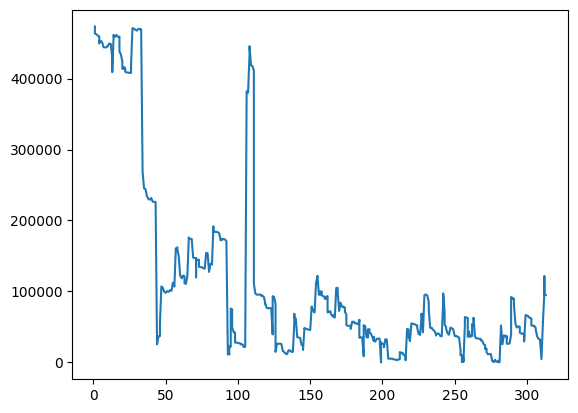

In [86]:
plt.plot(df['Tday'], df['balance'])

In [130]:
df.iloc[56:65]

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
56,17-03-2022,Cr,2400.0,469802.96,NEFT,NaN,17,03,2022,31
57,20-03-2022,Db,18.0,469784.96,SMS CHARGES,NaN,20,03,2022,32
58,20-03-2022,Db,500.0,469284.96,UPI,SANGALLI,22,03,2022,32
59,22-03-2022,Db,1.0,469283.96,UPI,KIRNAKUMA,20,03,2022,33
60,23-03-2022,Db,200000.0,269283.96,CHEQUE,NaN,23,03,2022,34
61,25-03-2022,Db,24000.0,245283.96,UPI,ABUTALAH,25,03,2022,35
62,26-03-2022,Db,1000.0,244283.96,UPI,ABUTALAH,26,03,2022,36
63,28-03-2022,Db,10000.0,234283.96,ATM,NaN,28,03,2022,37
64,31-03-2022,Db,4000.0,230283.96,UPI,ABUTALAH,31,03,2022,38


In [147]:
df = df.set_index('date')

In [143]:
df['date'] = pd.to_datetime(df['date'], format ="%d-%m-%Y")

In [148]:
df.index

DatetimeIndex(['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-07',
               '2022-01-10', '2022-01-10', '2022-01-10', '2022-01-10',
               '2022-01-10', '2022-01-12',
               ...
               '2023-10-04', '2023-10-04', '2023-10-04', '2023-10-05',
               '2023-10-05', '2023-10-06', '2023-10-06', '2023-10-06',
               '2023-10-06', '2023-10-07'],
              dtype='datetime64[ns]', name='date', length=509, freq=None)

In [149]:
df.to_csv('bankstatements.csv')